## Econometrics - BSc AIDAMS

Prof. Roberto Renò - ESSEC Business School 

## Homework 1

In [127]:
import os
import sys

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import matplotlib.pyplot as plt

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = "./"
data_out = dirname + "da_case_studies/ch04-management-firm-size/"
output = dirname + "da_case_studies/ch04-management-firm-size/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders (double check you have this on your pc)
data_in = "./"
data_out = dirname + "/Data/"
output = "./"
func = "./"
sys.path.append(func)

# Import the prewritten helper functions
#from py_helper_functions import *
import warnings

warnings.filterwarnings("ignore")

In [128]:
# Import data from your favourite location
df = pd.read_csv(data_in + "wms_da_textbook.csv")

In [129]:
df.loc[lambda x: (x["wave"] == 2014)].country.unique()

array(['United States', 'Germany', 'France', 'Great Britain', 'Greece',
       'Italy', 'Portugal'], dtype=object)

In [130]:
# Sample selection for your homework (part A and B)
df1 = df.loc[
    lambda x: (x["country"] == "France")
    & (x["wave"] == 2014)
]

In [131]:
df1.describe()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0,141.0
mean,4652.574468,2014.0,30.524823,2.996740,2.957447,3.509220,2.941489,2.627660,2.921986,2.992908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,128.837951,0.0,5.255720,0.521241,0.864972,0.693428,0.586392,0.523131,0.971530,0.882338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4445.000000,2014.0,20.000000,1.722222,1.000000,1.800000,1.600000,1.666667,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4543.000000,2014.0,26.000000,2.611111,2.500000,3.000000,2.400000,2.333333,2.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4653.000000,2014.0,32.000000,3.055556,3.000000,3.400000,3.000000,2.500000,3.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4739.000000,2014.0,35.000000,3.388889,3.500000,4.000000,3.200000,3.000000,4.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4923.000000,2014.0,39.000000,4.222222,5.000000,5.000000,4.400000,4.166667,5.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
list(df1)

['firmid',
 'wave',
 'cty',
 'country',
 'sic',
 'management',
 'operations',
 'monitor',
 'target',
 'people',
 'lean1',
 'lean2',
 'perf1',
 'perf2',
 'perf3',
 'perf4',
 'perf5',
 'perf6',
 'perf7',
 'perf8',
 'perf9',
 'perf10',
 'talent1',
 'talent2',
 'talent3',
 'talent4',
 'talent5',
 'talent6',
 'emp_firm',
 'firmage',
 'ownership',
 'mne_yn',
 'mne_cty',
 'competition',
 'export',
 'degree_m',
 'degree_nm',
 'degree_t',
 'i_seniority',
 'reliability',
 'aa_1',
 'aa_2',
 'aa_3',
 'aa_4',
 'aa_5',
 'aa_6',
 'aa_7',
 'aa_8',
 'aa_9',
 'aa_10',
 'aa_11',
 'aa_12',
 'aa_13',
 'aa_14',
 'aa_15',
 'aa_16',
 'aa_17',
 'aa_18',
 'aa_19',
 'aa_20',
 'aa_21',
 'aa_22',
 'aa_23',
 'aa_24',
 'aa_25',
 'aa_26',
 'aa_27',
 'aa_28',
 'aa_29',
 'aa_30',
 'aa_31',
 'aa_32',
 'aa_33',
 'aa_34',
 'aa_35',
 'aa_36',
 'aa_37',
 'aa_38',
 'aa_39',
 'aa_40',
 'aa_41',
 'aa_42',
 'aa_43',
 'aa_44',
 'aa_45',
 'aa_46',
 'aa_47',
 'aa_48',
 'aa_49',
 'aa_50',
 'aa_51',
 'aa_52',
 'aa_53',
 'aa_54',
 'a

## Management Quality and Firm Performance

The data for this case study is from a large-scale research project aiming to fill this gap. The World Management Survey (WMS; http://worldmanagementsurvey.org) collects data on management practices from many firms and other organizations across various industries and countries. This is a major international survey that combines a traditional survey methodology with other methods; see Sections 1.5 and 1.6 below on data collection methods.

The most important variables in the WMS are the management practice “scores.”. Eighteen such scores are in the data, each measuring the quality of management practices in an important area, such as tracking and reviewing performance, the time horizon and breadth of targets, or attracting and retaining human capital. The scores range from 1 through 5, with 1 indicating worst practice and 5 indicating best practice. Importantly, this is the intended content of the variable. The actual content is determined by how it is measured: what information is used to construct the score, where that information comes from, how the scores are constructed from that information, whether there is room for error in that process, and so on.

## Questions 

Part A

We focus on France, 2014 data (parts A-B-C). Management scores are in the column "management". The number of employees is in the column "emp_firm".

1. Display an histogram of the "management" scores. Which theoretical distribution could fit?
2. Compute the sample average and sample standard deviation of the "management" score.
3. Display an histogram of the "number of employees". Which theoretical distribution would fit?
4. Find a transformation of the variable "number of employees" such that its distribution looks like a normal distribution. (hint: the closer your distribution to a Normal distribution, the closer its kurtosis to 3)

Part B: finding associations

We now measure management quality by the "management" variable and firm size by the "emp_firm" variable.

5. Divide the firm size into three quantiles with roughly the same number of observations in the three quantiles. Call these three sets small, intermediate and big firms respectively.
6. Compute the average management score for small, intermediate and big firms.
7. Test if there is a significant difference in management score between big and small firms.
8. Create a scatter plot between firm size and management score.
9. Create a scatter plot between log(firm size) and management score.
10. Compute the correlations between the variables at point 8 and 9. Comment.


Part C: simple regression

11. Consider a linear regression based on the model explaining management score by firm size (point 8). Estimate the linear model using OLS.
12. Repeat the estimate in point 11 now in a model in which management score is explained by log(firm size) (point 9).
13. Compare the R^2 of the two regressions. Explain.

Part D: choose your country/year

14. Repeat the analysis of part C with your favourite country in the most recent year at your disposal. Please make sure you have at least 100 data entries. Are your results consistent with France in 2014? It is ok to expand on this part as much as you want.




---

## PART A

### 1.

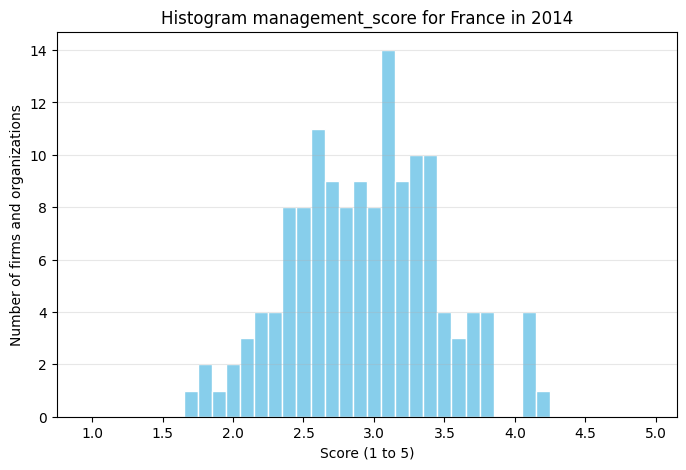

In [133]:
# Configuration of the histogram
bins_precision = np.arange(1, 5.1, 0.1)
plt.figure(figsize=(8, 5))
plt.hist(df1['management'], bins=bins_precision, edgecolor='white', color='skyblue', align='left')

# Personnalisation of the axes and title
plt.title('Histogram management_score for France in 2014')
plt.xlabel('Score (1 to 5)')
plt.ylabel('Number of firms and organizations')
plt.xticks(np.arange(1,5.5,0.5)) # ticks every 0.5
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.show()

From what we can see in this histogram : an almost well-shaped bell, with a strong density at the middle (around 3) and low density when we approach extremes.

-> We think that a theorical normal distribution can fit with this data observed.

Let's see below :

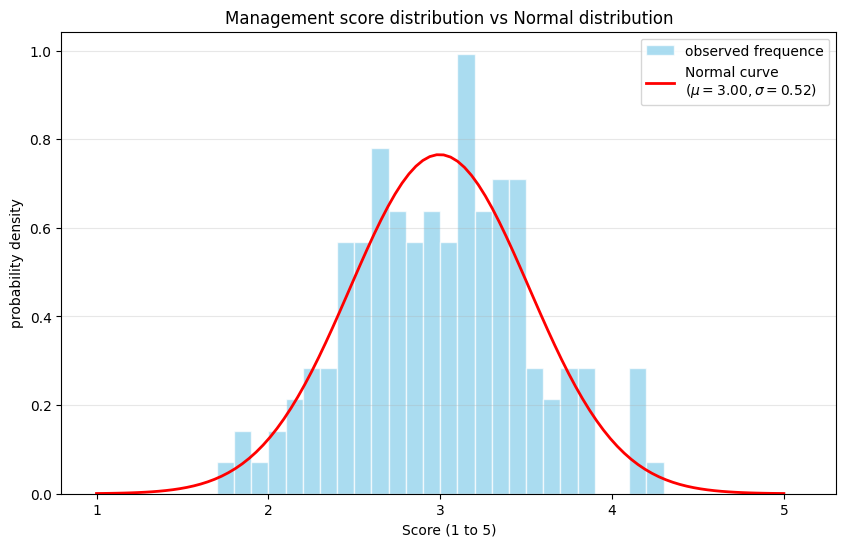

In [134]:
data = df1['management']
mean = data.mean()
std_dev = data.std()

# Generate the normal distribution curve data
x = np.linspace(1, 5, 100)
y = norm.pdf(x, mean, std_dev)

# Plot the histogram and the normal distribution curve
plt.figure(figsize=(10, 6))

# 'density=True' is required to match the scale of the normal curve
plt.hist(data, bins=np.arange(1, 5.2, 0.1), density=True, 
         edgecolor='white', color='skyblue', alpha=0.7, label='observed frequence')

# Plot the theorical normal distribution curve
plt.plot(x, y, color='red', linewidth=2, label=f'Normal curve\n($\mu={mean:.2f}, \sigma={std_dev:.2f}$)')

# Formatting
plt.title('Management score distribution vs Normal distribution')
plt.xlabel('Score (1 to 5)')
plt.ylabel('probability density')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

### 2.

In [135]:
# We can re use what we did when we decided to add & plot then normal distribution curve to the histogram :
"""
data = df1['management']
mean = data.mean()
std_dev = data.std()
"""

print(f'The mean is {mean:.4f} and the standard deviation is {std_dev:.4f} of the management score for France in 2014.')


The mean is 2.9967 and the standard deviation is 0.5212 of the management score for France in 2014.


### 3.

In [136]:
df1['emp_firm'].describe()

count     141.000000
mean      557.319149
std       813.706514
min        52.000000
25%       105.000000
50%       200.000000
75%       600.000000
max      4000.000000
Name: emp_firm, dtype: float64

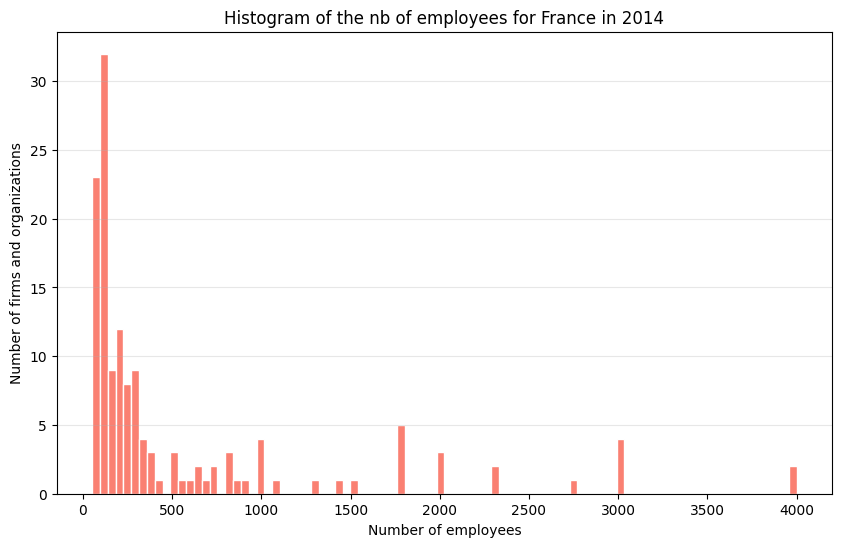

In [137]:
# Configuration of the histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['emp_firm'], bins=90, edgecolor='white', color='salmon')

# Personnalisation of the axes and title
plt.title('Histogram of the nb of employees for France in 2014')
plt.xlabel('Number of employees')
plt.ylabel('Number of firms and organizations')
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.show()

Looking at the histogram for the number of employees in France, we can see that the data is extremely right-skewed with a very long tail. While an exponential distribution might seem like a possible candidate because of the rapid decay, it would actually be a poor fit for this specific dataset. The main problem with the exponential model is that it assumes the highest frequency of firms is at the absolute minimum value, starting with a steep drop immediately. However, our data shows that there is a specific entry threshold for these firms, and the frequency actually peaks slightly after the minimum rather than at zero.

Instead, visually, the histogram matches the characteristic shape of a **lognormal density**, where the bulk of the observations are concentrated at lower values with a smooth, long-reaching tail for the very large "giant" firms. The best theoretical fit for this variable is the **lognormal distribution**.

### 4.

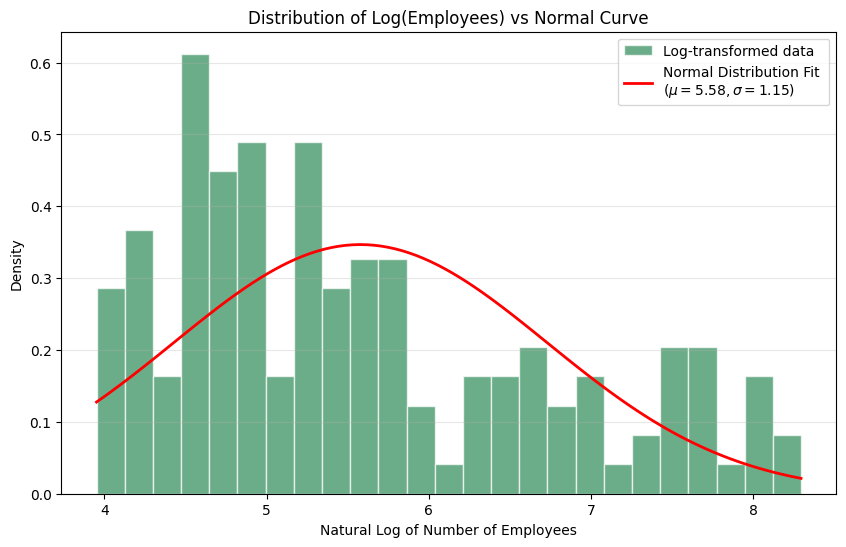

The Kurtosis of the log variable is: 2.48


In [138]:
from scipy.stats import norm

# Apply the transformation
# We use the natural logarithm as it is the standard 'fix' for skewed firm data
df1['ln_emp_firm'] = np.log(df1['emp_firm'])

# Configuration of the histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['ln_emp_firm'], bins=25, density=True, 
         color='seagreen', edgecolor='white', alpha=0.7, label='Log-transformed data')

# Create the Normal Curve overlay using the mean and std of our new logged variable
mu = df1['ln_emp_firm'].mean()
sigma = df1['ln_emp_firm'].std()
x = np.linspace(df1['ln_emp_firm'].min(), df1['ln_emp_firm'].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', lw=2, label=f'Normal Distribution Fit \n($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

# Formatting
plt.title('Distribution of Log(Employees) vs Normal Curve')
plt.xlabel('Natural Log of Number of Employees')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

# Check the Kurtosis (the 'hint' in the question)
# Pandas .kurtosis() is 'excess', so we add 3.
print(f"The Kurtosis of the log variable is: {df1['ln_emp_firm'].kurtosis() + 3:.2f}")

*From the PANDAS documentation we understood that :* 

Pandas .kurtosis() function calculates what is called Excess Kurtosis.

Excess Kurtosis is defined as: Kurtosis−3.
This is done so that a Normal Distribution equals 0 instead of 3, making it easier to see at a glance if a distribution is "flatter" (negative) or "peakier" (positive) than a normal curve.

When we run df['column'].kurtosis(), Python gives us the Excess Kurtosis. If our data were perfectly normal, Python would return 0. This is why we added +3

---

## PART B

### 5.

In [147]:
small_firms = df1.loc[lambda x: x['emp_firm'] <= np.quantile(df1['emp_firm'], 0.33)]

intermediate_firms = df1.loc[lambda x: (x['emp_firm'] > np.quantile(df1['emp_firm'], 0.33)) & (x['emp_firm'] <= np.quantile(df1['emp_firm'], 0.66))]

big_firms = df1.loc[lambda x: x['emp_firm'] > np.quantile(df1['emp_firm'], 0.66)]

print(f"Number of small firms: {len(small_firms)}")
print(f"Number of intermediate firms: {len(intermediate_firms)}")
print(f"Number of big firms: {len(big_firms)}")

Number of small firms: 47
Number of intermediate firms: 46
Number of big firms: 48


To devide the firm size "emp_firm" into 3 quantiles with roughly the same size we use de quantile 33%, then the 33-66% and finally >66%. 

As we can see with the number of firms in each cluster, they are almost the same (between 46-48)

### 6.

In [159]:
print(f'The avg management score for the small firms is: {small_firms['management'].mean():.2f}')
print(f'The avg management score for the intermediate firms is: {intermediate_firms['management'].mean():.2f}')
print(f'The avg management score for the big firms is: {big_firms['management'].mean():.2f}')

The avg management score for the small firms is: 2.78
The avg management score for the intermediate firms is: 2.92
The avg management score for the big firms is: 3.29


avg ( Management small firms < Management mid firms < Management big firms )

From this observation we can deduce that there is potentially a link between the average management score and the size of the companies. 

Is the management better executed in big firms ? 

### 7.

H0 (Null): There is no difference in the average management score between big and small firms.

H1 (Alternative): There is a significant difference.

In [161]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(big_firms['management'], small_firms['management'], equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.10f}")

# Interpretation
if p_val < 0.05:
    print("Conclusion: Reject the Null Hypothesis. There is a significant difference.")
else:
    print("Conclusion: Fail to reject the Null. The difference is not statistically significant.")

t-statistic: 4.8549
p-value: 0.0000049019
Conclusion: Reject the Null Hypothesis. There is a significant difference.


### 8.

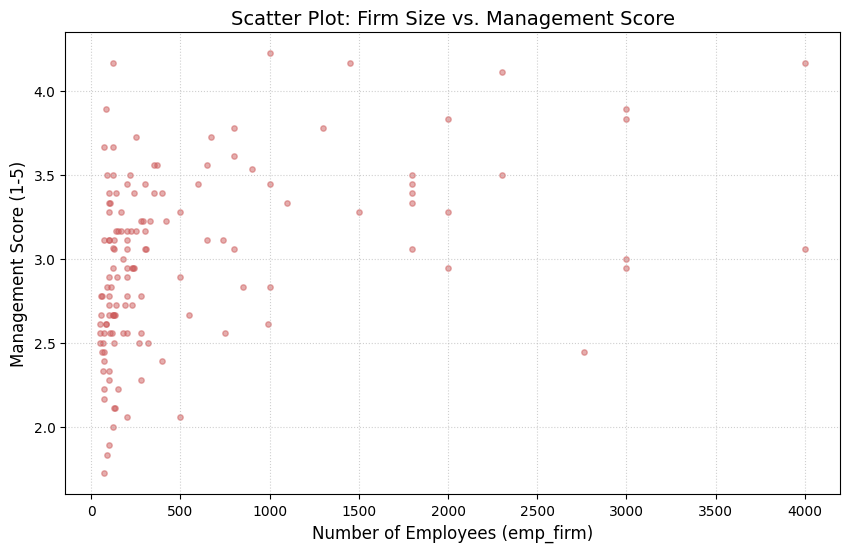

In [166]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(df1['emp_firm'], df1['management'], 
            alpha=0.5, color='indianred', s=15)

# Labeling the graph
plt.title('Scatter Plot: Firm Size vs. Management Score', fontsize=14)
plt.xlabel('Number of Employees (emp_firm)', fontsize=12)
plt.ylabel('Management Score (1-5)', fontsize=12)

# Display
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

### 9.

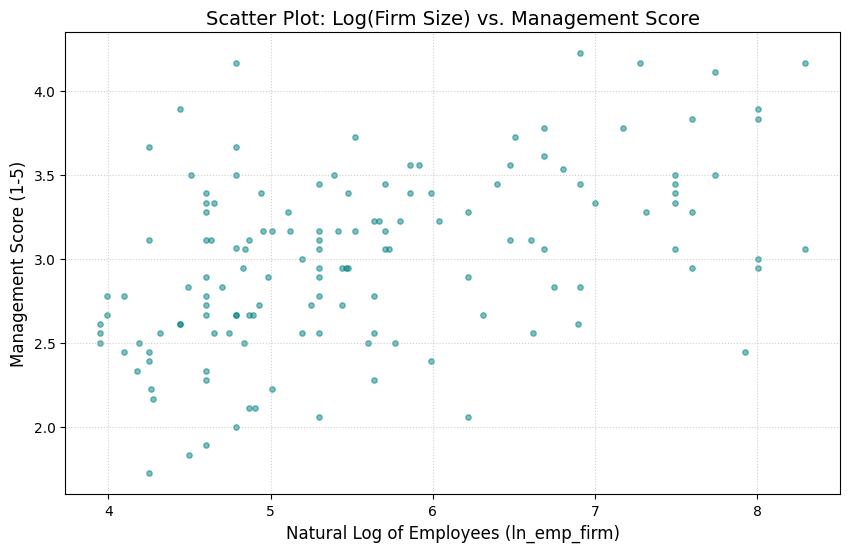

In [163]:
# Create the figure
plt.figure(figsize=(10, 6))

# We can directly use the column 'ln_emp_firm' that we created earlier
# Alpha is kept at 0.5 to show where the data is most concentrated
plt.scatter(df1['ln_emp_firm'], df1['management'], 
            alpha=0.5, color='teal', s=15)

# Labeling the graph
plt.title('Scatter Plot: Log(Firm Size) vs. Management Score', fontsize=14)
plt.xlabel('Natural Log of Employees (ln_emp_firm)', fontsize=12)
plt.ylabel('Management Score (1-5)', fontsize=12)

# Display
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()